In [1]:
import pandas as pd
import itertools

In [2]:
bus =  pd.read_csv('business.csv')

In [3]:
user= pd.read_csv('user_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
user['friends']=user['friends'].replace(" ", "")

In [5]:
user['friends']=user["friends"].apply(lambda x: str(x).split(','))

In [6]:
bus_sc = bus[bus['state']=='SC']

In [11]:
new1 = pd.merge(bus_review,user,how = 'inner', on ='user_id')

In [12]:
new1_fr = pd.concat([new1['user_id'],new1['friends']],axis=1)

In [13]:
new1_fr.head()

,user_id,friends
0,JQ2y5r56Zb_RLRwR78KBKQ,"[3GpAL7FyPtk4W84mkR8QWw, KymiXT13_w38PunigDyu..."
1,JQ2y5r56Zb_RLRwR78KBKQ,"[3GpAL7FyPtk4W84mkR8QWw, KymiXT13_w38PunigDyu..."
2,JQ2y5r56Zb_RLRwR78KBKQ,"[3GpAL7FyPtk4W84mkR8QWw, KymiXT13_w38PunigDyu..."
3,JQ2y5r56Zb_RLRwR78KBKQ,"[3GpAL7FyPtk4W84mkR8QWw, KymiXT13_w38PunigDyu..."
4,JQ2y5r56Zb_RLRwR78KBKQ,"[3GpAL7FyPtk4W84mkR8QWw, KymiXT13_w38PunigDyu..."


In [14]:
new1_fr=new1_fr.set_index(['user_id'])['friends'].apply(pd.Series).stack()

In [15]:
new1_fr = new1_fr.to_frame().reset_index()

In [16]:
new1_fr.pop('level_1')
new1_fr.head()

,user_id,0
0,JQ2y5r56Zb_RLRwR78KBKQ,3GpAL7FyPtk4W84mkR8QWw
1,JQ2y5r56Zb_RLRwR78KBKQ,KymiXT13_w38PunigDyuVg
2,JQ2y5r56Zb_RLRwR78KBKQ,vkhqCsqX-js9JQBaizttNA
3,JQ2y5r56Zb_RLRwR78KBKQ,GNutN8IEXLswuT_zh9XCgw
4,JQ2y5r56Zb_RLRwR78KBKQ,l3TWXXatxClgBxZ9x18XBw


In [17]:
new1_fr.columns = ['user_id','friend_id']
new1_fr.head()

,user_id,friend_id
0,JQ2y5r56Zb_RLRwR78KBKQ,3GpAL7FyPtk4W84mkR8QWw
1,JQ2y5r56Zb_RLRwR78KBKQ,KymiXT13_w38PunigDyuVg
2,JQ2y5r56Zb_RLRwR78KBKQ,vkhqCsqX-js9JQBaizttNA
3,JQ2y5r56Zb_RLRwR78KBKQ,GNutN8IEXLswuT_zh9XCgw
4,JQ2y5r56Zb_RLRwR78KBKQ,l3TWXXatxClgBxZ9x18XBw


In [18]:
new1_fr['friend_id']= new1_fr['friend_id'].str.strip()

In [19]:
finallist= new1_fr.user_id.unique().tolist()

In [20]:
filtered = new1_fr.loc[(new1_fr['friend_id'].isin(finallist))]

In [22]:
filtered.drop_duplicates(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
filtered.to_csv('test_friends_sc.csv')

In [7]:
review = pd.read_csv('review.csv')

In [8]:
bus_review = pd.merge(bus_sc,review,how='inner',on='business_id')

In [ ]:
bus_review.head()

In [9]:
bus_review.pop('stars_x')
bus_review.head()


,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,review_count,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,817,"6277 Carolina Commons Dr, Ste 600",{'BusinessAcceptsCreditCards': 'True'},lY_wkAm9RaedOGqfqxmSnw,"Post Offices, Notaries, Shipping Centers, Loca...",Indian Land,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,34.936948,-80.83846,...,6,SC,0,2017-11-08 23:08:43,0.0,q-T1H1bRi8BffmsPAtmuRg,5.0,"Yep, as good as it gets, consistently. Jessica...",0.0,JQ2y5r56Zb_RLRwR78KBKQ
1,817,"6277 Carolina Commons Dr, Ste 600",{'BusinessAcceptsCreditCards': 'True'},lY_wkAm9RaedOGqfqxmSnw,"Post Offices, Notaries, Shipping Centers, Loca...",Indian Land,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,34.936948,-80.83846,...,6,SC,0,2017-06-22 15:20:23,0.0,kv7qCQKuV3AERwYXbalLTQ,1.0,FOLLOW UP TO OWNER'S COMMENT: I tried to rea...,0.0,kTnHG9Es6Vh-CmcnL-QmQQ
2,817,"6277 Carolina Commons Dr, Ste 600",{'BusinessAcceptsCreditCards': 'True'},lY_wkAm9RaedOGqfqxmSnw,"Post Offices, Notaries, Shipping Centers, Loca...",Indian Land,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,34.936948,-80.83846,...,6,SC,0,2017-06-20 15:55:25,0.0,_Ro0Qy9H7_kNBZIO5Vr2rA,1.0,AWFUL customer service. It was much better wh...,0.0,kTnHG9Es6Vh-CmcnL-QmQQ
3,817,"6277 Carolina Commons Dr, Ste 600",{'BusinessAcceptsCreditCards': 'True'},lY_wkAm9RaedOGqfqxmSnw,"Post Offices, Notaries, Shipping Centers, Loca...",Indian Land,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,34.936948,-80.83846,...,6,SC,0,2017-07-02 00:02:44,0.0,00nJjKmEnuixL6l0-IG1ww,2.0,Left off a piece of mail for PO pick up on a M...,0.0,lMuJZ0E7v9zr-YGeqtfrIA
4,817,"6277 Carolina Commons Dr, Ste 600",{'BusinessAcceptsCreditCards': 'True'},lY_wkAm9RaedOGqfqxmSnw,"Post Offices, Notaries, Shipping Centers, Loca...",Indian Land,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,34.936948,-80.83846,...,6,SC,0,2017-06-22 17:28:46,0.0,aL1nCC9AcsihstinbUgNMg,5.0,They are the administrative arm of a national ...,0.0,Jr6Tkpjb3v6U_-hq5OJC3g


In [10]:
bus_review.to_csv('dummy_bus_sc.csv')


In [ ]:
#for b in ['WwwYZakdSQM9174gdZdUIA']:
    #for u in bus_review[bus_review['business_id']==b]['user_id']:
        #for F in user[user['user_id']==u]['friends']:
            #for f in F:
                #if f in (bus_review[bus_review['business_id']==b]['user_id']).tolist():
                    #df2.append({'friend_id':f,'friend_rating':bus_review[(bus_review['business_id']==b) & (bus_review['user_id']==f)]['stars_y'].item(),'user_id':u,'user_rating':bus_review[(bus_review['business_id']==b) & (bus_review['user_id']==u)]['stars_y'].item()}, ignore_index=True)

In [24]:
x = pd.concat([bus_review['user_id'],bus_review['business_id'],bus_review['stars_y']],axis=1)
x.head()

,user_id,business_id,stars_y
0,JQ2y5r56Zb_RLRwR78KBKQ,lY_wkAm9RaedOGqfqxmSnw,5.0
1,kTnHG9Es6Vh-CmcnL-QmQQ,lY_wkAm9RaedOGqfqxmSnw,1.0
2,kTnHG9Es6Vh-CmcnL-QmQQ,lY_wkAm9RaedOGqfqxmSnw,1.0
3,lMuJZ0E7v9zr-YGeqtfrIA,lY_wkAm9RaedOGqfqxmSnw,2.0
4,Jr6Tkpjb3v6U_-hq5OJC3g,lY_wkAm9RaedOGqfqxmSnw,5.0


In [25]:
y = x.groupby(['business_id','user_id']).stars_y.mean()
y.head()

business_id             user_id               
-3CH8R_x6SGiDobpUhrvkg  M1hm7GCzLHr2qH3229fQyA    1.0
                        QqTwGvy03ugbFtqFEh1m3A    5.0
                        gxozFOqa03W-B_JCG1trsw    5.0
-6e0liTvH5EoB4HuncuQgA  3Vwia0HW3qLHS1sC3GFJTg    5.0
                        3kRvuw-shQgCbVdamuXinw    1.0
Name: stars_y, dtype: float64

In [26]:
x = y.to_frame().reset_index()

In [27]:
x.head()

,business_id,user_id,stars_y
0,-3CH8R_x6SGiDobpUhrvkg,M1hm7GCzLHr2qH3229fQyA,1.0
1,-3CH8R_x6SGiDobpUhrvkg,QqTwGvy03ugbFtqFEh1m3A,5.0
2,-3CH8R_x6SGiDobpUhrvkg,gxozFOqa03W-B_JCG1trsw,5.0
3,-6e0liTvH5EoB4HuncuQgA,3Vwia0HW3qLHS1sC3GFJTg,5.0
4,-6e0liTvH5EoB4HuncuQgA,3kRvuw-shQgCbVdamuXinw,1.0


In [100]:
#bus_review[(bus_review['business_id']=='iS35nqM4b0XXVIgAlvkawg') & (bus_review['user_id']=='H_-K6erSJYtzg3ZEvOg3EQ')]

In [ ]:
friend_id = []
user_id = []
user_rating = []
friend_rating = []
business_id = []
for b in set(x['business_id']):
    print('business: {}'.format(b))
    for u in x[x['business_id']==b]['user_id']:
        #print('user: {}'.format(u))
        F=filtered[filtered['user_id']==u]['friend_id'].tolist()
        #F = list(itertools.chain.from_iterable(F))
        for f in F:
            #print('friend: {}'.format(f))
            if f in (x[x['business_id']==b]['user_id']).tolist():
                print('condition passed')
                business_id.append(b)
                friend_id.append(f)
                user_id.append(u)
                user_rating.append(x[(x['business_id']==b) & (x['user_id']==u)]['stars_y'].item())
                friend_rating.append(x[(x['business_id']==b) & (x['user_id']==f)]['stars_y'].item())

dic2 = {'business_id':business_id,'user_id':user_id,'friend_id':friend_id,'user_rating':user_rating,'friend_rating':friend_rating}
df5 = pd.DataFrame(data=dic2)


                    


In [29]:
df5.head()

,business_id,user_id,friend_id,user_rating,friend_rating
0,xbM9ejOu5ROD32WhwxGFxQ,SlgpAnj2gQd44EM_Uq6DkQ,xhlcoVm3FOKcxZ0phkdO6Q,3.0,4.0
1,xbM9ejOu5ROD32WhwxGFxQ,SlgpAnj2gQd44EM_Uq6DkQ,hWDybu_KvYLSdEFzGrniTw,3.0,2.0
2,xbM9ejOu5ROD32WhwxGFxQ,SlgpAnj2gQd44EM_Uq6DkQ,cx4-WfPgm1Jxurtd83I83g,3.0,4.0
3,xbM9ejOu5ROD32WhwxGFxQ,cx4-WfPgm1Jxurtd83I83g,SlgpAnj2gQd44EM_Uq6DkQ,4.0,3.0
4,xbM9ejOu5ROD32WhwxGFxQ,f47N37WU1_PsQKxvZdaTwA,hWDybu_KvYLSdEFzGrniTw,3.0,2.0


In [30]:
df5.to_csv('LikeList.csv')

In [60]:
like = pd.read_csv('LikeList_mod.csv')

In [61]:
like.head()

,user_id,friend_id,user_rating,friend_rating,user sent,friend sent,Match,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,SlgpAnj2gQd44EM_Uq6DkQ,xhlcoVm3FOKcxZ0phkdO6Q,3.0,4.0,positive,positive,like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SlgpAnj2gQd44EM_Uq6DkQ,hWDybu_KvYLSdEFzGrniTw,3.0,2.0,positive,negative,unlike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SlgpAnj2gQd44EM_Uq6DkQ,cx4-WfPgm1Jxurtd83I83g,3.0,4.0,positive,positive,like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cx4-WfPgm1Jxurtd83I83g,SlgpAnj2gQd44EM_Uq6DkQ,4.0,3.0,positive,positive,like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f47N37WU1_PsQKxvZdaTwA,hWDybu_KvYLSdEFzGrniTw,3.0,2.0,positive,negative,unlike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
like = pd.concat([like['user_id'],like['friend_id'],like['Match']],axis=1)

In [63]:
like.head()

,user_id,friend_id,Match
0,SlgpAnj2gQd44EM_Uq6DkQ,xhlcoVm3FOKcxZ0phkdO6Q,like
1,SlgpAnj2gQd44EM_Uq6DkQ,hWDybu_KvYLSdEFzGrniTw,unlike
2,SlgpAnj2gQd44EM_Uq6DkQ,cx4-WfPgm1Jxurtd83I83g,like
3,cx4-WfPgm1Jxurtd83I83g,SlgpAnj2gQd44EM_Uq6DkQ,like
4,f47N37WU1_PsQKxvZdaTwA,hWDybu_KvYLSdEFzGrniTw,unlike


In [64]:
type(like)

pandas.core.frame.DataFrame

In [65]:
like = pd.get_dummies(like,columns=['Match'])



In [66]:
like.head()

,user_id,friend_id,Match_like,Match_unlike
0,SlgpAnj2gQd44EM_Uq6DkQ,xhlcoVm3FOKcxZ0phkdO6Q,1,0
1,SlgpAnj2gQd44EM_Uq6DkQ,hWDybu_KvYLSdEFzGrniTw,0,1
2,SlgpAnj2gQd44EM_Uq6DkQ,cx4-WfPgm1Jxurtd83I83g,1,0
3,cx4-WfPgm1Jxurtd83I83g,SlgpAnj2gQd44EM_Uq6DkQ,1,0
4,f47N37WU1_PsQKxvZdaTwA,hWDybu_KvYLSdEFzGrniTw,0,1


In [67]:
like2 = like.groupby(['user_id','friend_id']).sum()
like2.head()

,,Match_like,Match_unlike
user_id,friend_id,,
-0b84SUGVN0YkG5j2MCmBw,0cG35-H4SbjjTTSlNoK3fw,1,0
-1it-1oll1OOP6KMsF-Auw,E43QxgV87Ij6KxMCHcijKw,1,0
-3a9i4F7Xtx63kbXIhtUOw,aIpNNJl-wfdKDtYAPTuwpg,1,0
-5e4VTnu_pR4Gpv3VSncaw,5jJjY5_R06Og56VfjIc66A,1,0
-6559fkJ6rCWIZDbqVUomA,SJ4JJuxSnx6kB1Q8s4uVdg,1,0


In [68]:
like2.to_csv('like_new.csv')

In [69]:
like_new = pd.read_csv('like_new.csv')

In [70]:
like_new.head()

,user_id,friend_id,Match_like,Match_unlike
0,-0b84SUGVN0YkG5j2MCmBw,0cG35-H4SbjjTTSlNoK3fw,1,0
1,-1it-1oll1OOP6KMsF-Auw,E43QxgV87Ij6KxMCHcijKw,1,0
2,-3a9i4F7Xtx63kbXIhtUOw,aIpNNJl-wfdKDtYAPTuwpg,1,0
3,-5e4VTnu_pR4Gpv3VSncaw,5jJjY5_R06Og56VfjIc66A,1,0
4,-6559fkJ6rCWIZDbqVUomA,SJ4JJuxSnx6kB1Q8s4uVdg,1,0


In [72]:
len(like_new)

3312

In [74]:
like_new2 = like_new[like_new['Match_unlike']<like_new['Match_like']]

In [75]:
like_new2.count()

user_id         2856
friend_id       2856
Match_like      2856
Match_unlike    2856
dtype: int64

In [76]:
like_new2.to_csv('like_new2.csv')

In [ ]:
##F=user[user['user_id']=='jx_XRSDWOc95Zvts98IPCA']['friends'].tolist()

In [ ]:
#filtered[filtered['user_id']=='U95wccXN_J8JwA5Ktlu8tw']['friend_id']

In [ ]:
#temp=bus_review[bus_review['business_id']==b]['user_id'].tolist()

In [77]:
like_network = pd.read_excel('like_network.xlsx')

In [78]:
like_network.head()

,user_id,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient
0,x6c5IrnYnY9T3AyC0oldqw,1,0.000000,1.000000,0.000000,0.999999,0.000000
1,wzTr_7rugAXqn7fiusWZKg,1,0.000000,1.000000,0.000000,0.999999,0.000000
2,wvlyT9f9mbJwtVZFEuNMnA,1,0.000000,0.000543,0.000534,0.289764,0.000000
3,v2PkGI7MjkmyRzht2bMWQw,19,2109.062102,0.000756,0.009957,3.124131,0.269006
4,yeKWWabfHNF6BHzQOh_Gbg,1,0.000000,0.000440,0.000118,0.316837,0.000000


In [80]:
user_merge = pd.merge(like_network,user,how = 'inner', on = 'user_id')

In [81]:
user_merge.head()

,user_id,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,...,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since
0,x6c5IrnYnY9T3AyC0oldqw,1,0.000000,1.000000,0.000000,0.999999,0.000000,5.00,0,0,...,0,0,NaN,0,"[wyYPmY5S9E6IK3hnQp0fKw, YpdWy56CuzOoJ3dDU4cw...",0,David,1,0,2016-03-19 18:04:39
1,wzTr_7rugAXqn7fiusWZKg,1,0.000000,1.000000,0.000000,0.999999,0.000000,2.33,0,0,...,0,2,NaN,1,"[GwF4kUfAvwUAS0Z0n8uk-w, ZmE_v2k6qNMmKqvYNBFl...",5,Liane,19,31,2013-05-24 22:41:32
2,wvlyT9f9mbJwtVZFEuNMnA,1,0.000000,0.000543,0.000534,0.289764,0.000000,3.63,3,0,...,2,0,NaN,2,"[AvC5XQAElcGAAn_Wr5auEg, 7bM26xzdm4PN-F6D4QPx...",0,James,7,7,2012-07-21 19:55:55
3,v2PkGI7MjkmyRzht2bMWQw,19,2109.062102,0.000756,0.009957,3.124131,0.269006,3.77,13,0,...,12,183,"2014,2015,2016,2017,2018",22,"[BGnBrhN91-2HCQ3gCZe3tg, QmethzRyAvZXS9m1UNJp...",130,George,391,570,2012-03-26 12:08:54
4,yeKWWabfHNF6BHzQOh_Gbg,1,0.000000,0.000440,0.000118,0.316837,0.000000,3.95,0,0,...,1,5,NaN,0,"[q7Jo4ITfIP5EsV2hBA-b6w, mD6KaGlJfpa5EXRZcHNW...",2,Jessie,18,15,2011-08-16 01:03:31


In [99]:
user_merge.corr()

,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,compliment_funny,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
Degree,1.000000,0.922906,-0.218844,0.946353,0.961159,0.113121,-0.036136,0.237266,0.169401,0.237266,...,0.298093,0.226798,0.282028,0.294886,0.317672,0.278071,0.343559,0.227786,0.451707,0.322372
Betweenness Centrality,0.922906,1.000000,-0.152324,0.789194,0.944230,-0.005733,-0.025119,0.224155,0.129125,0.224155,...,0.260815,0.231193,0.256354,0.300988,0.309545,0.301052,0.316493,0.243992,0.432551,0.341881
Closeness Centrality,-0.218844,-0.152324,1.000000,-0.295687,0.001791,-0.269197,-0.038698,-0.055681,-0.063992,-0.055681,...,-0.071785,-0.031608,-0.062105,-0.045898,-0.056324,-0.056807,-0.113916,-0.046709,-0.162043,-0.071389
Eigenvector Centrality,0.946353,0.789194,-0.295687,1.000000,0.851144,0.209131,-0.055196,0.233124,0.168364,0.233124,...,0.297167,0.208618,0.268428,0.280132,0.306204,0.252663,0.318128,0.212711,0.452598,0.295457
PageRank,0.961159,0.944230,0.001791,0.851144,1.000000,0.021154,-0.035138,0.217356,0.144068,0.217356,...,0.269213,0.218365,0.259733,0.275113,0.294189,0.266291,0.320440,0.216423,0.398912,0.306451
Clustering Coefficient,0.113121,-0.005733,-0.269197,0.209131,0.021154,1.000000,-0.019520,0.055095,0.056105,0.055095,...,0.062257,0.036289,0.049423,0.047222,0.053204,0.042102,0.076206,0.045225,0.082574,0.047002
average_stars,-0.036136,-0.025119,-0.038698,-0.055196,-0.035138,-0.019520,1.000000,-0.035274,-0.023166,-0.035274,...,-0.053438,-0.034780,-0.039430,-0.044490,-0.060777,-0.024407,-0.028519,-0.024318,-0.064589,-0.032944
compliment_cool,0.237266,0.224155,-0.055681,0.233124,0.217356,0.055095,-0.035274,1.000000,0.910912,1.000000,...,0.960325,0.971435,0.915740,0.932115,0.904664,0.921111,0.903626,0.931936,0.762973,0.914623
compliment_cute,0.169401,0.129125,-0.063992,0.168364,0.144068,0.056105,-0.023166,0.910912,1.000000,0.910912,...,0.905718,0.852453,0.870111,0.759192,0.757409,0.767130,0.874079,0.789703,0.603720,0.759404
compliment_funny,0.237266,0.224155,-0.055681,0.233124,0.217356,0.055095,-0.035274,1.000000,0.910912,1.000000,...,0.960325,0.971435,0.915740,0.932115,0.904664,0.921111,0.903626,0.931936,0.762973,0.914623


In [97]:
import seaborn as sns

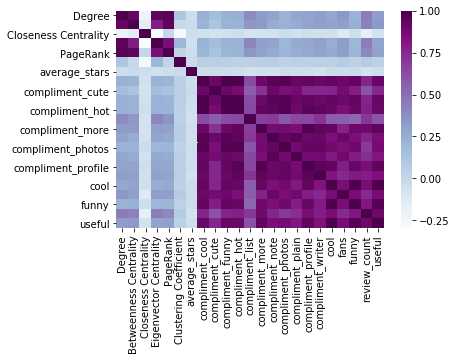

In [98]:
sns.heatmap(user_merge.corr(),cmap='BuPu')

In [86]:
user_std = user_merge.drop(columns=['user_id','elite','friends','name','yelping_since'],axis=1)

In [88]:
user_std.head()

,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,compliment_funny,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
0,1,0.000000,1.000000,0.000000,0.999999,0.000000,5.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0.000000,1.000000,0.000000,0.999999,0.000000,2.33,0,0,0,...,0,0,0,0,0,2,1,5,19,31
2,1,0.000000,0.000543,0.000534,0.289764,0.000000,3.63,3,0,3,...,2,1,1,0,2,0,2,0,7,7
3,19,2109.062102,0.000756,0.009957,3.124131,0.269006,3.77,13,0,13,...,11,2,25,8,12,183,22,130,391,570
4,1,0.000000,0.000440,0.000118,0.316837,0.000000,3.95,0,0,0,...,1,0,1,0,1,5,0,2,18,15


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
Std = StandardScaler()

In [89]:
Std.fit(user_std)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
std_trans = Std.transform(user_std)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [92]:
std_x = pd.DataFrame(std_trans,columns=user_std.columns)

In [93]:
std_x.head()

,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,compliment_funny,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
0,-0.374239,-0.257396,1.776414,-0.499519,-1.957218e-07,-0.488553,1.852440,-0.148605,-0.148011,-0.148605,...,-0.196997,-0.123968,-0.168354,-0.134572,-0.187889,-0.110214,-0.239592,-0.094418,-0.355352,-0.141940
1,-0.374239,-0.257396,1.776414,-0.499519,-1.957218e-07,-0.488553,-2.702303,-0.148605,-0.148011,-0.148605,...,-0.196997,-0.123968,-0.168354,-0.134572,-0.187889,-0.109697,-0.226114,-0.093074,-0.319254,-0.134965
2,-0.374239,-0.257396,-0.592246,-0.304792,-5.545149e-01,-0.488553,-0.484638,-0.136526,-0.148011,-0.136526,...,-0.176360,-0.114883,-0.164516,-0.134572,-0.167007,-0.110214,-0.212636,-0.094418,-0.343319,-0.140365
3,1.938792,0.895790,-0.591741,3.131383,1.658412e+00,0.523769,-0.245813,-0.096262,-0.148011,-0.096262,...,-0.083494,-0.105798,-0.072400,0.277542,-0.062601,-0.062963,0.056921,-0.059480,0.426786,-0.013695
4,-0.374239,-0.257396,-0.592490,-0.456490,-5.333777e-01,-0.488553,0.061249,-0.148605,-0.148011,-0.148605,...,-0.186678,-0.123968,-0.164516,-0.134572,-0.177448,-0.108923,-0.239592,-0.093880,-0.321259,-0.138565


In [94]:
user_merge_std = pd.concat([user_merge['user_id'],std_x],axis=1)

In [95]:
user_merge_std.head()

,user_id,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
0,x6c5IrnYnY9T3AyC0oldqw,-0.374239,-0.257396,1.776414,-0.499519,-1.957218e-07,-0.488553,1.852440,-0.148605,-0.148011,...,-0.196997,-0.123968,-0.168354,-0.134572,-0.187889,-0.110214,-0.239592,-0.094418,-0.355352,-0.141940
1,wzTr_7rugAXqn7fiusWZKg,-0.374239,-0.257396,1.776414,-0.499519,-1.957218e-07,-0.488553,-2.702303,-0.148605,-0.148011,...,-0.196997,-0.123968,-0.168354,-0.134572,-0.187889,-0.109697,-0.226114,-0.093074,-0.319254,-0.134965
2,wvlyT9f9mbJwtVZFEuNMnA,-0.374239,-0.257396,-0.592246,-0.304792,-5.545149e-01,-0.488553,-0.484638,-0.136526,-0.148011,...,-0.176360,-0.114883,-0.164516,-0.134572,-0.167007,-0.110214,-0.212636,-0.094418,-0.343319,-0.140365
3,v2PkGI7MjkmyRzht2bMWQw,1.938792,0.895790,-0.591741,3.131383,1.658412e+00,0.523769,-0.245813,-0.096262,-0.148011,...,-0.083494,-0.105798,-0.072400,0.277542,-0.062601,-0.062963,0.056921,-0.059480,0.426786,-0.013695
4,yeKWWabfHNF6BHzQOh_Gbg,-0.374239,-0.257396,-0.592490,-0.456490,-5.333777e-01,-0.488553,0.061249,-0.148605,-0.148011,...,-0.186678,-0.123968,-0.164516,-0.134572,-0.177448,-0.108923,-0.239592,-0.093880,-0.321259,-0.138565


In [96]:
user_merge_std.corr()

,Degree,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,PageRank,Clustering Coefficient,average_stars,compliment_cool,compliment_cute,compliment_funny,...,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
Degree,1.000000,0.922906,-0.218844,0.946353,0.961159,0.113121,-0.036136,0.237266,0.169401,0.237266,...,0.298093,0.226798,0.282028,0.294886,0.317672,0.278071,0.343559,0.227786,0.451707,0.322372
Betweenness Centrality,0.922906,1.000000,-0.152324,0.789194,0.944230,-0.005733,-0.025119,0.224155,0.129125,0.224155,...,0.260815,0.231193,0.256354,0.300988,0.309545,0.301052,0.316493,0.243992,0.432551,0.341881
Closeness Centrality,-0.218844,-0.152324,1.000000,-0.295687,0.001791,-0.269197,-0.038698,-0.055681,-0.063992,-0.055681,...,-0.071785,-0.031608,-0.062105,-0.045898,-0.056324,-0.056807,-0.113916,-0.046709,-0.162043,-0.071389
Eigenvector Centrality,0.946353,0.789194,-0.295687,1.000000,0.851144,0.209131,-0.055196,0.233124,0.168364,0.233124,...,0.297167,0.208618,0.268428,0.280132,0.306204,0.252663,0.318128,0.212711,0.452598,0.295457
PageRank,0.961159,0.944230,0.001791,0.851144,1.000000,0.021154,-0.035138,0.217356,0.144068,0.217356,...,0.269213,0.218365,0.259733,0.275113,0.294189,0.266291,0.320440,0.216423,0.398912,0.306451
Clustering Coefficient,0.113121,-0.005733,-0.269197,0.209131,0.021154,1.000000,-0.019520,0.055095,0.056105,0.055095,...,0.062257,0.036289,0.049423,0.047222,0.053204,0.042102,0.076206,0.045225,0.082574,0.047002
average_stars,-0.036136,-0.025119,-0.038698,-0.055196,-0.035138,-0.019520,1.000000,-0.035274,-0.023166,-0.035274,...,-0.053438,-0.034780,-0.039430,-0.044490,-0.060777,-0.024407,-0.028519,-0.024318,-0.064589,-0.032944
compliment_cool,0.237266,0.224155,-0.055681,0.233124,0.217356,0.055095,-0.035274,1.000000,0.910912,1.000000,...,0.960325,0.971435,0.915740,0.932115,0.904664,0.921111,0.903626,0.931936,0.762973,0.914623
compliment_cute,0.169401,0.129125,-0.063992,0.168364,0.144068,0.056105,-0.023166,0.910912,1.000000,0.910912,...,0.905718,0.852453,0.870111,0.759192,0.757409,0.767130,0.874079,0.789703,0.603720,0.759404
compliment_funny,0.237266,0.224155,-0.055681,0.233124,0.217356,0.055095,-0.035274,1.000000,0.910912,1.000000,...,0.960325,0.971435,0.915740,0.932115,0.904664,0.921111,0.903626,0.931936,0.762973,0.914623
